In [1]:
from IPython.display import *
import ipywidgets as w

import CreateDataset
import importlib
importlib.reload(CreateDataset)
from CreateDataset import *



---

# **Preview fonts with some sample text**

In [ ]:
TEXT = "The quick brown fox jumped over the lazy dog."
TEXT = "ABCDEFGHIJKLMNOPQRSTUVWXYZ abcdefghijklmnopqrstuvwxyz 0123456789"
FONTNAMES_PATH_ALL = "fontnames all.txt"
FONTNAMES_PATH_COMMON = "fontnames common.txt"
FONTNAMES_PATH_NONSCRIPT = "fontnames nonscript.txt"
FONTNAMES_PATH_SCRIPT = "fontnames script.txt"

FONTNAMES_ALL = load_fontnames(FONTNAMES_PATH_ALL)
FONTNAMES_COMMON = load_fontnames(FONTNAMES_PATH_COMMON)
FONTNAMES_NONSCRIPT = load_fontnames(FONTNAMES_PATH_NONSCRIPT)
FONTNAMES_SCRIPT = load_fontnames(FONTNAMES_PATH_SCRIPT)

167



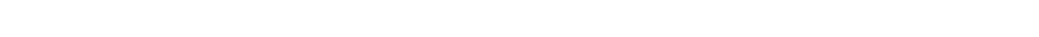
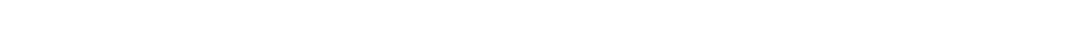
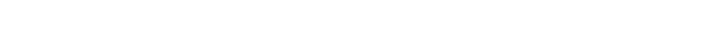
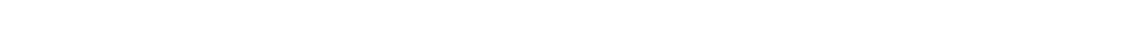
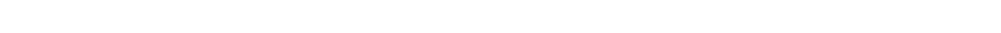
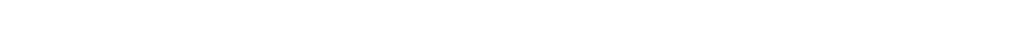
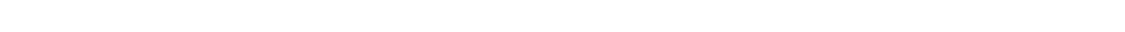
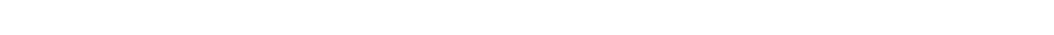
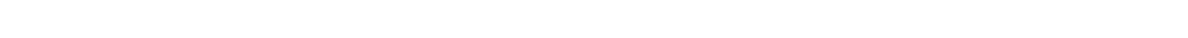
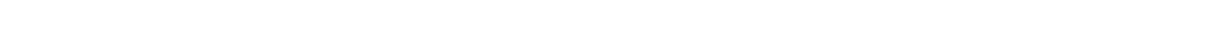
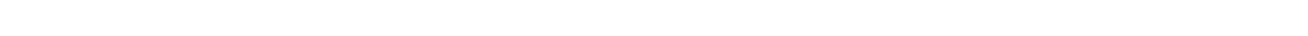
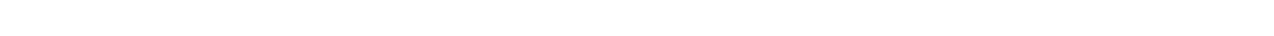
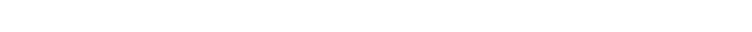
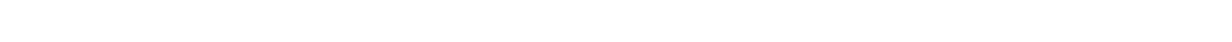
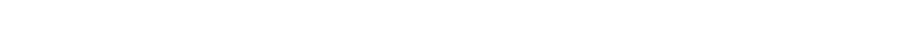
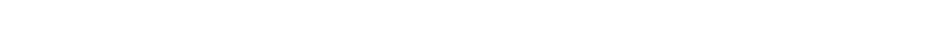
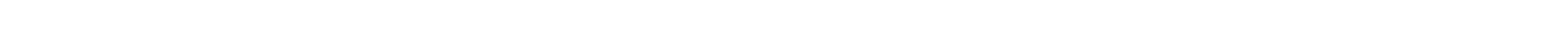
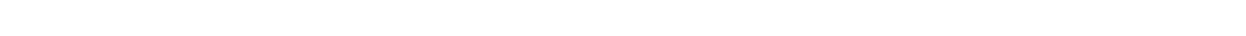
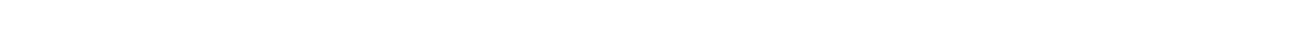
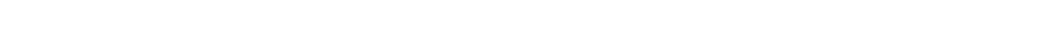
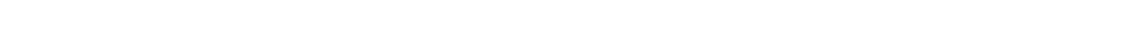
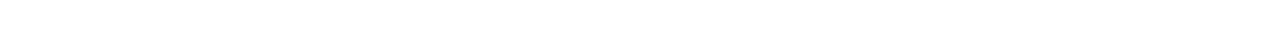

In [17]:
print(len(FONTNAMES_ALL))
HTML(preview_html_image(FONTNAMES_ALL, TEXT, 30))

149



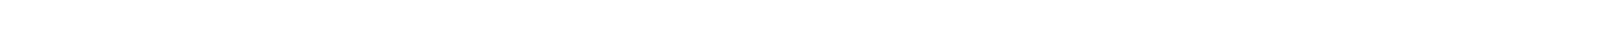
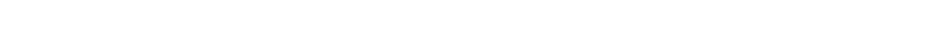
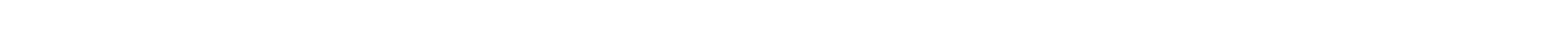
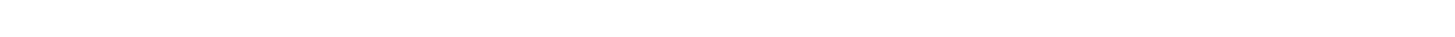
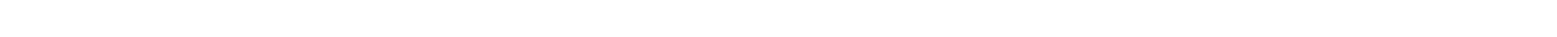
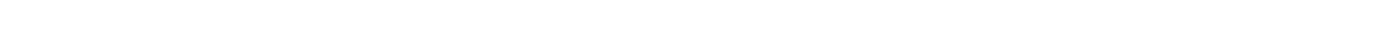
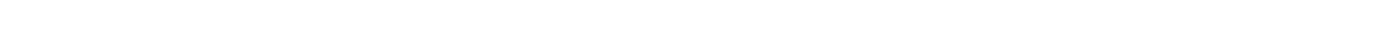
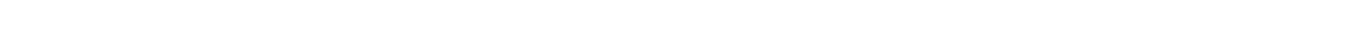
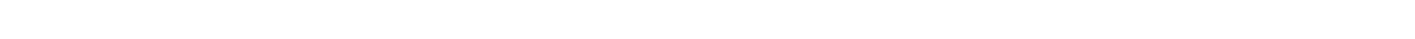
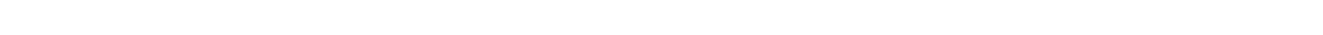
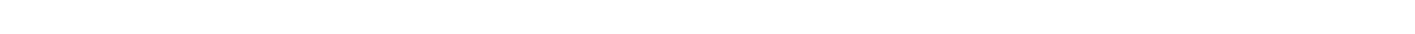
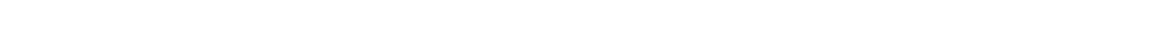
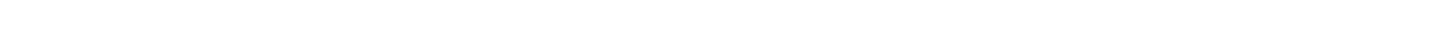
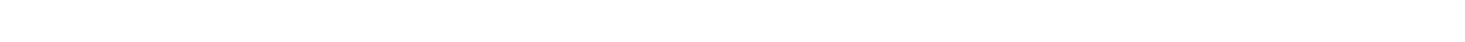
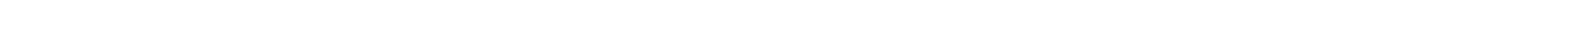
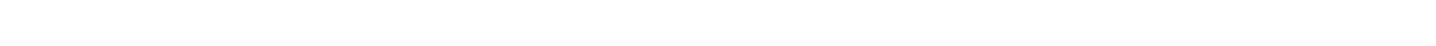
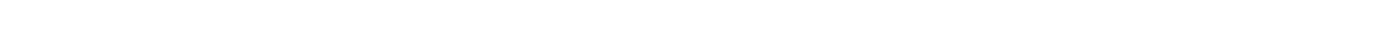
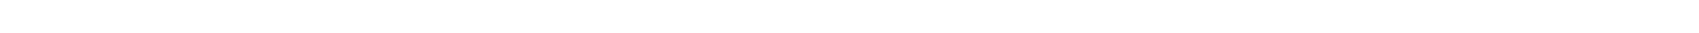
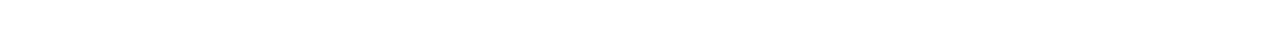
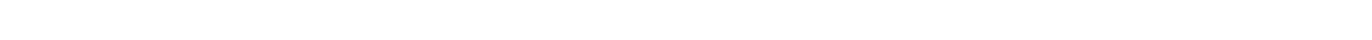
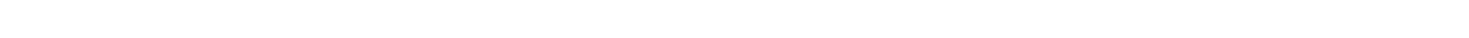
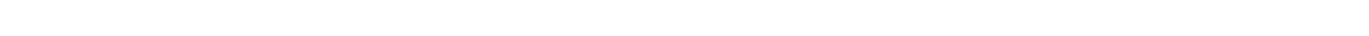
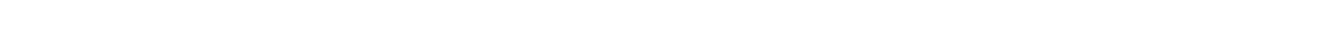
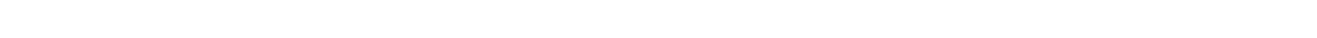
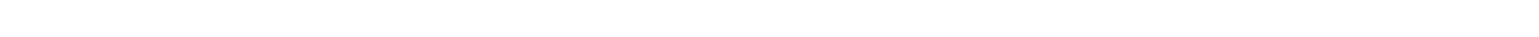
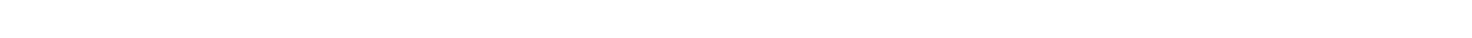
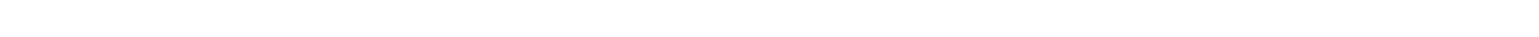
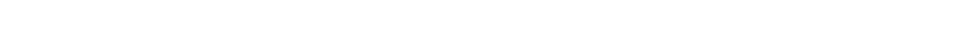
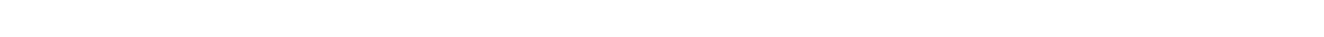
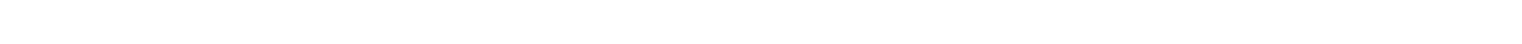
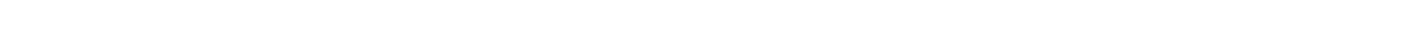
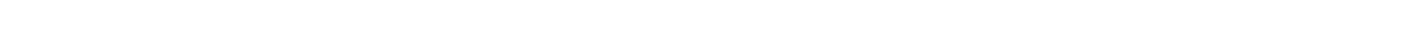
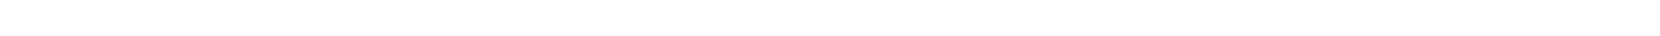
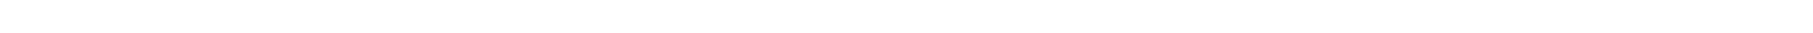
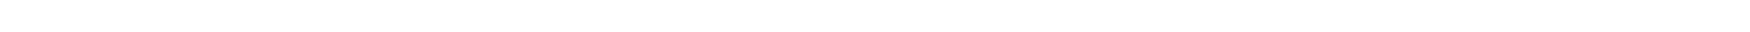
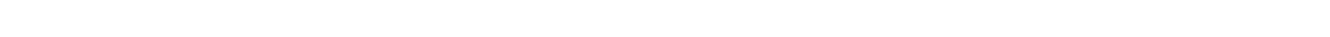
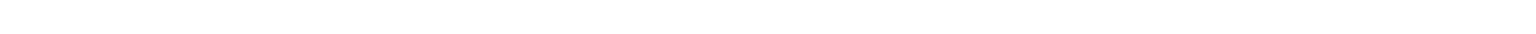
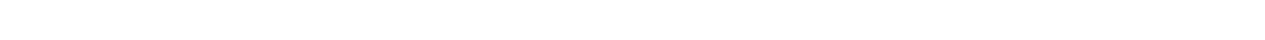
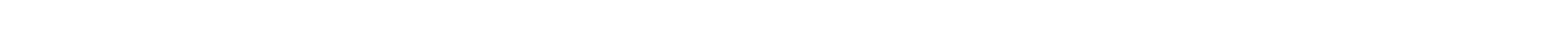
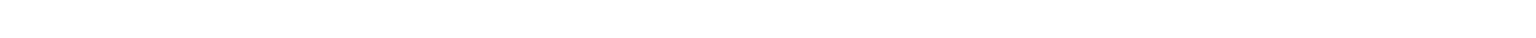
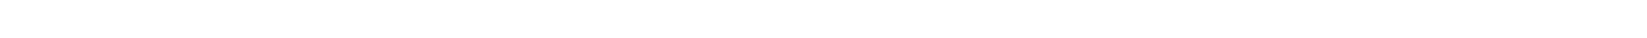
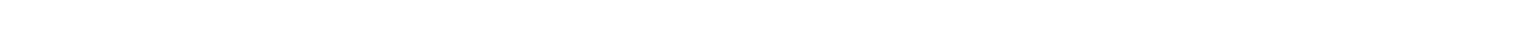
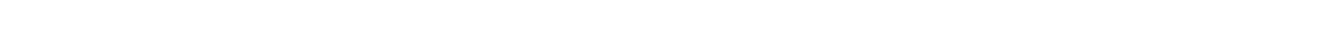
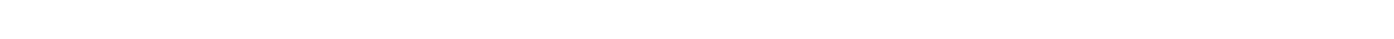
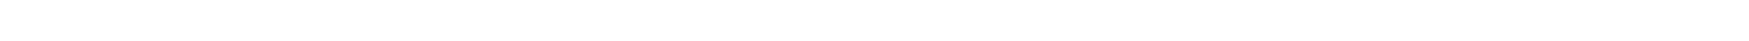
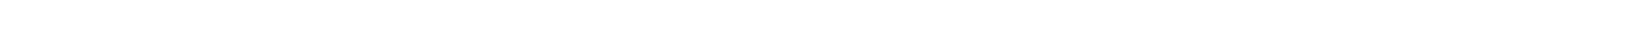
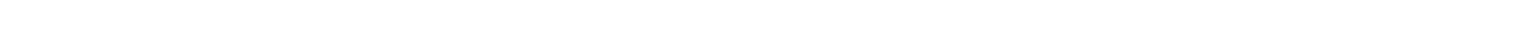
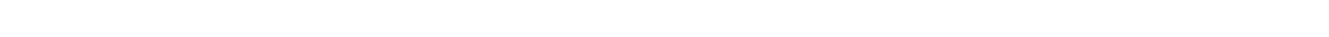
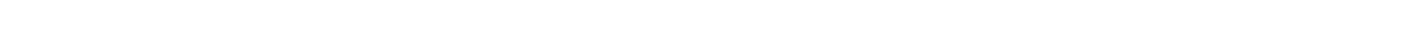
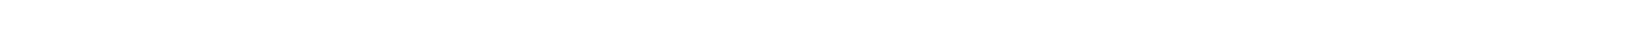
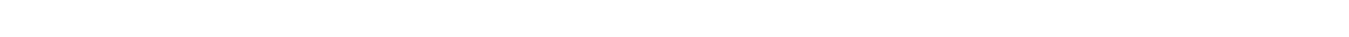
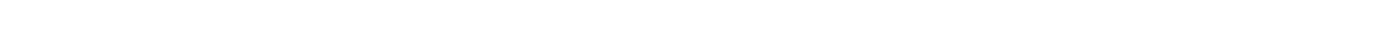
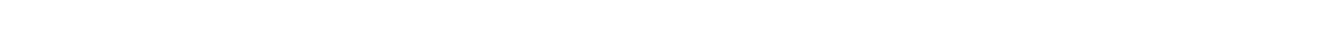
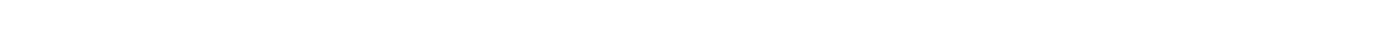
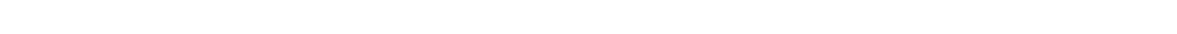
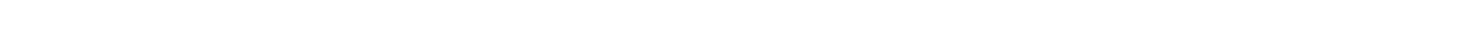
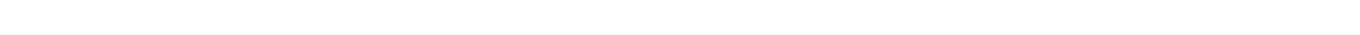
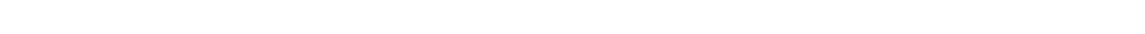
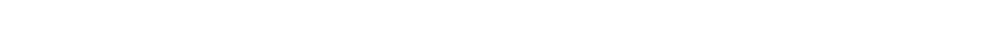
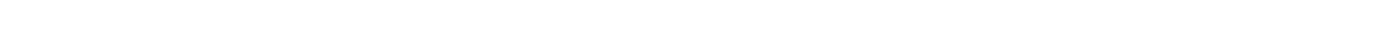
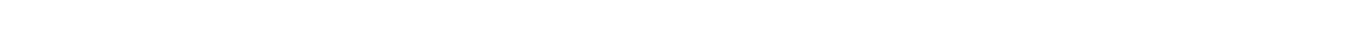
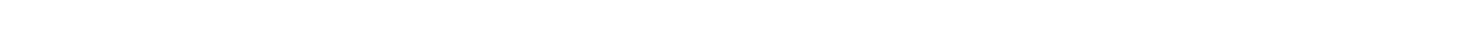
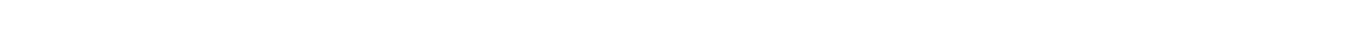
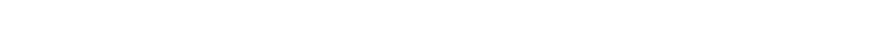
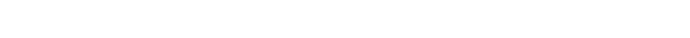
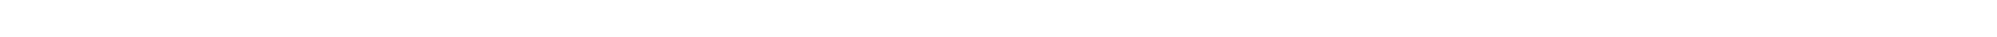
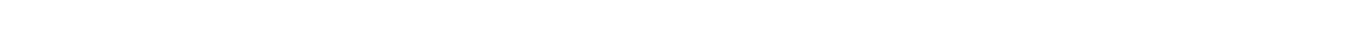
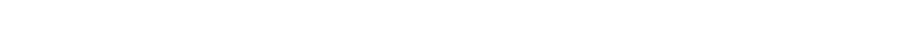
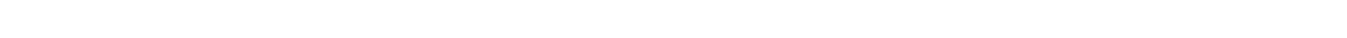
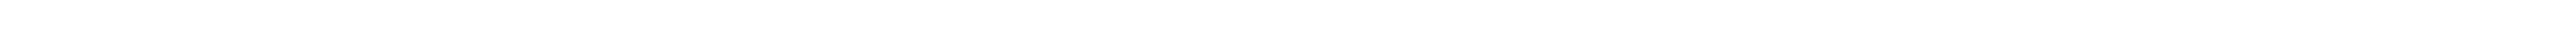
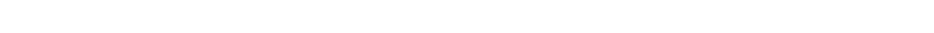
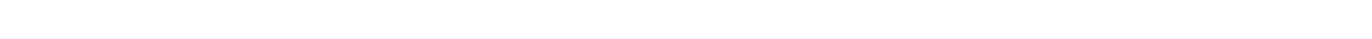
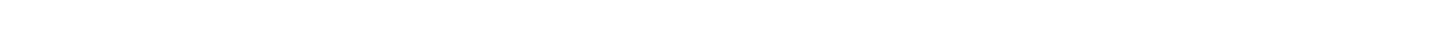
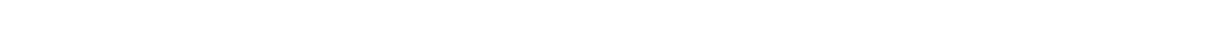
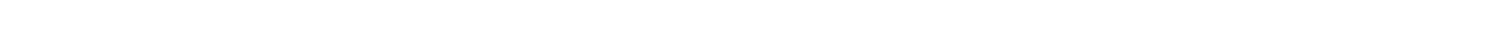
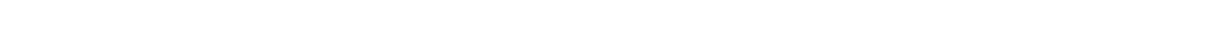
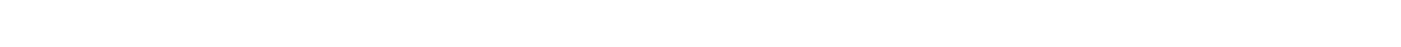
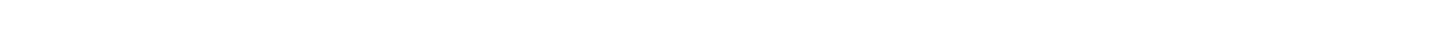
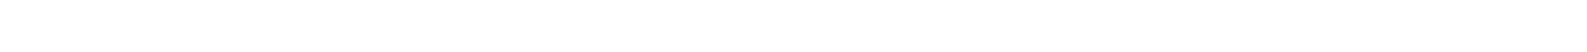
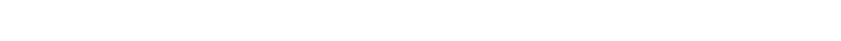
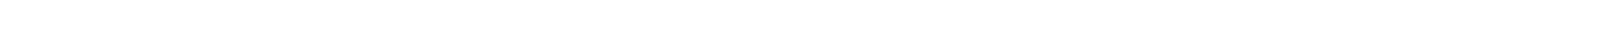
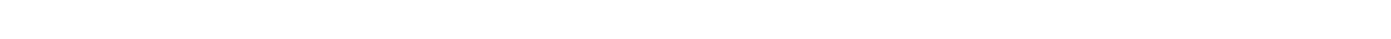
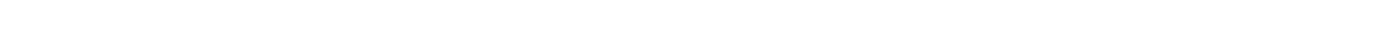
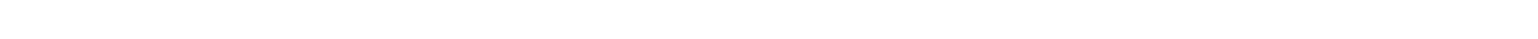
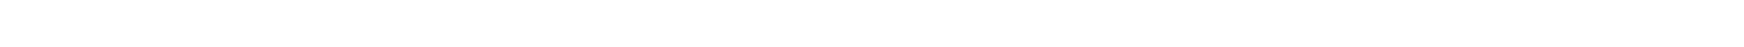
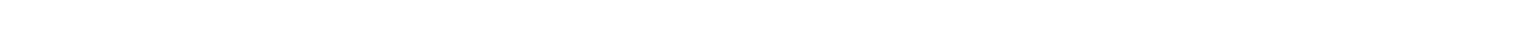
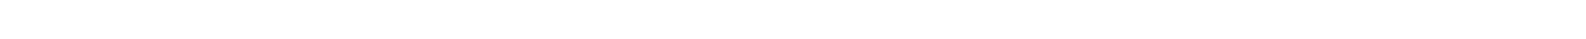
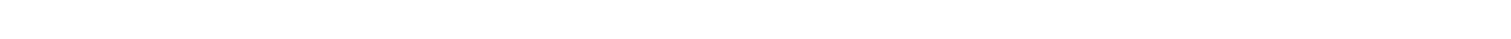
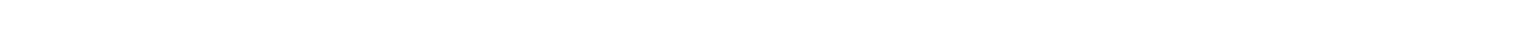
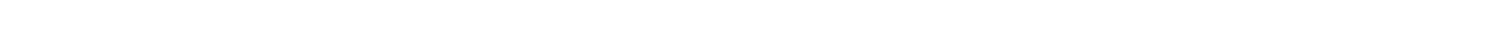
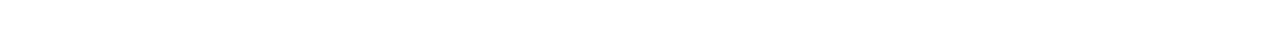
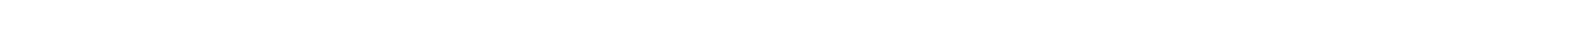
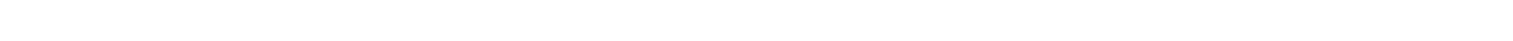
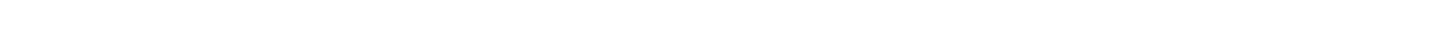
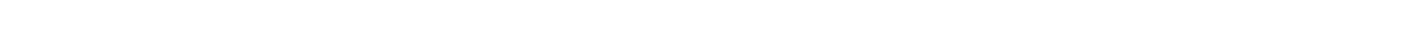
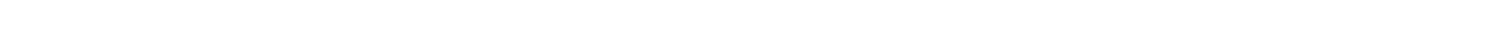
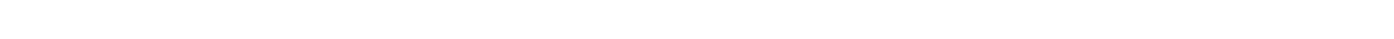
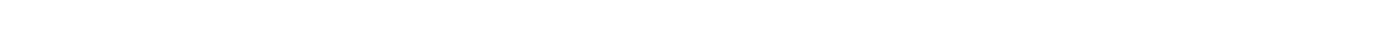
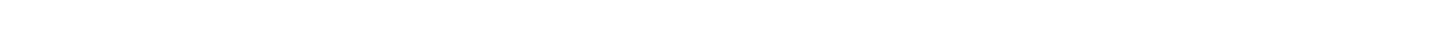
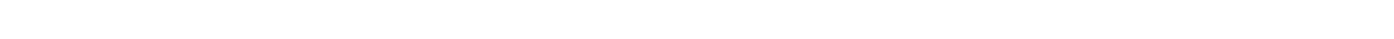
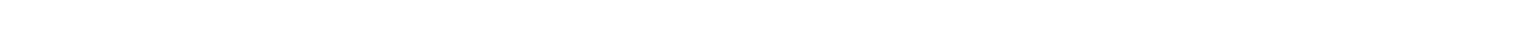
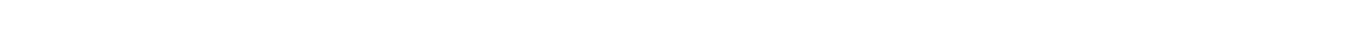
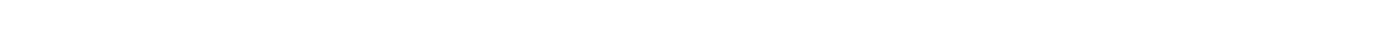
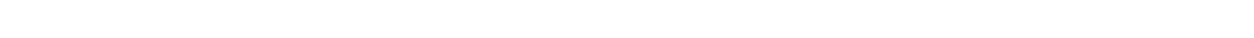
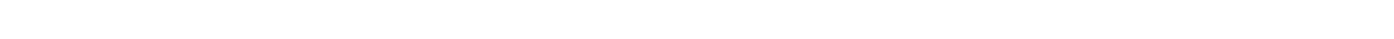
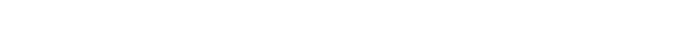
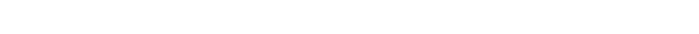
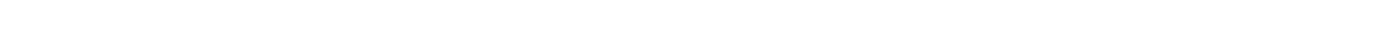
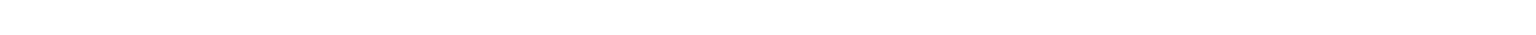
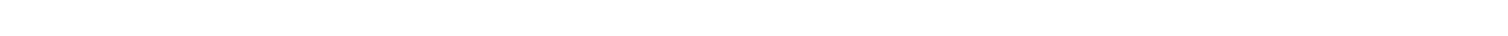
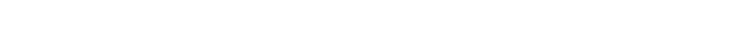
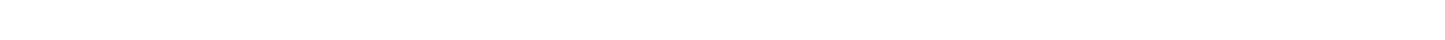
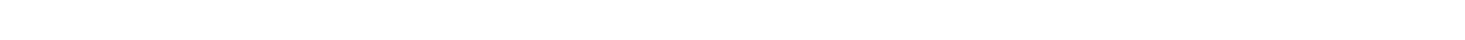
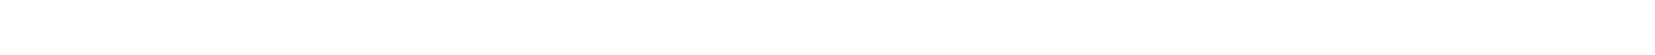
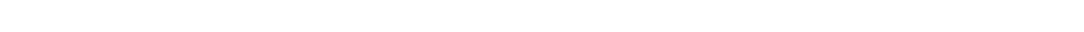
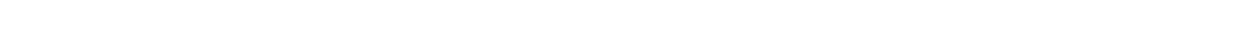
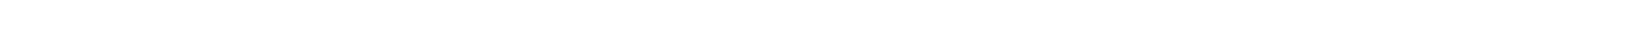
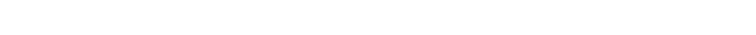
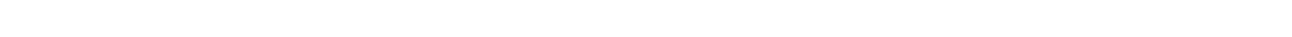
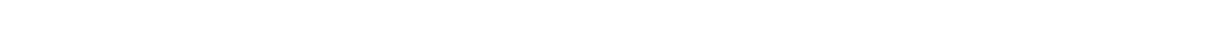
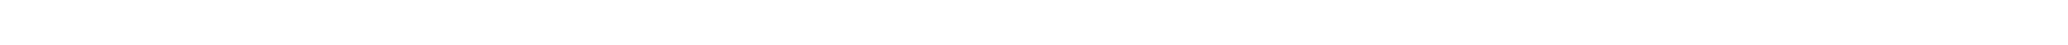
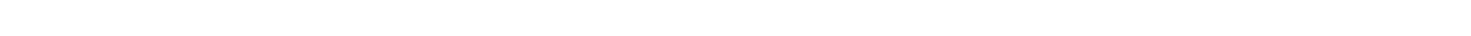
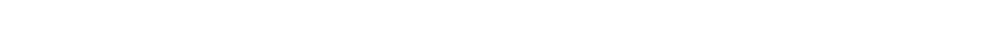
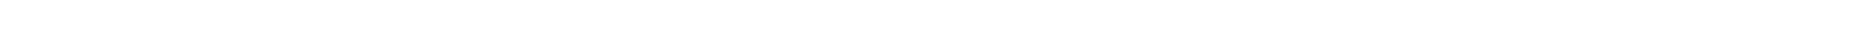
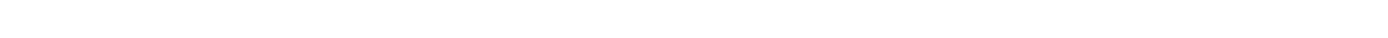
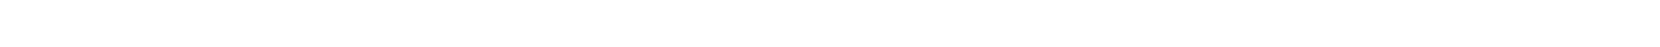
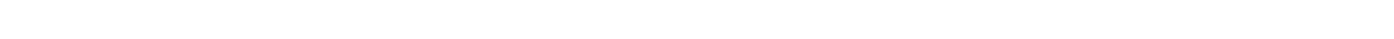
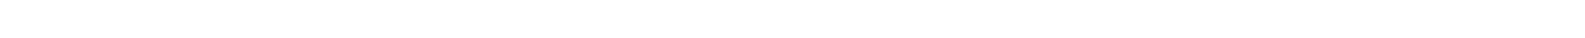
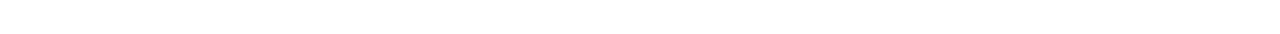
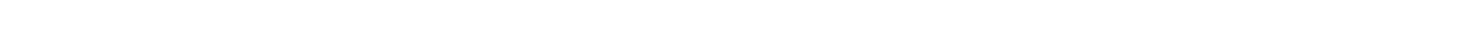
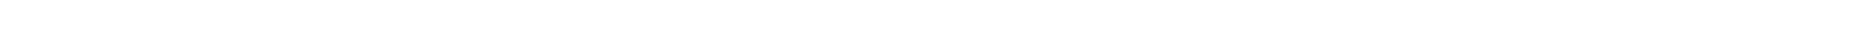
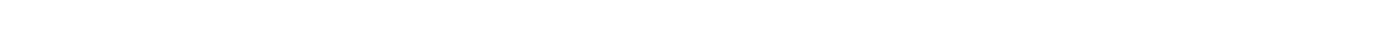
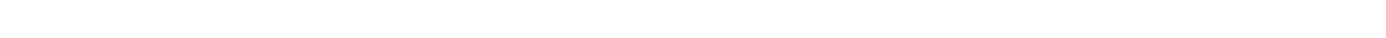
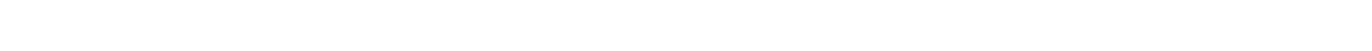
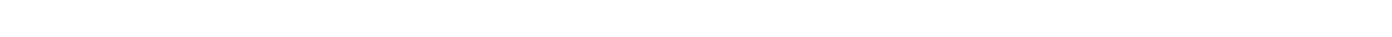
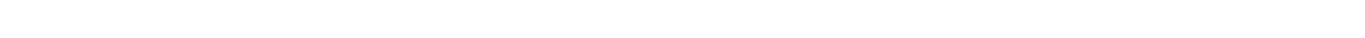
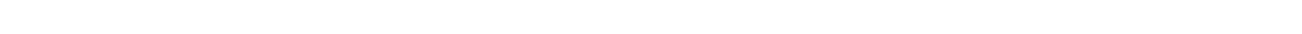
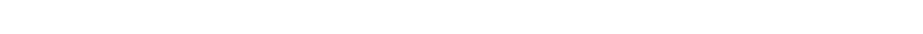
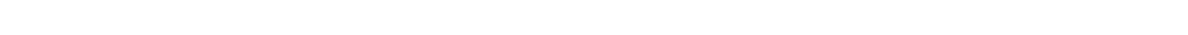
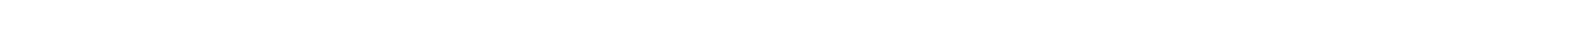
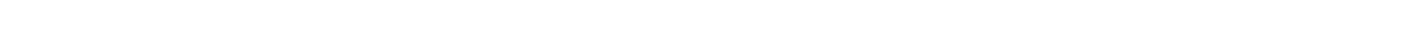
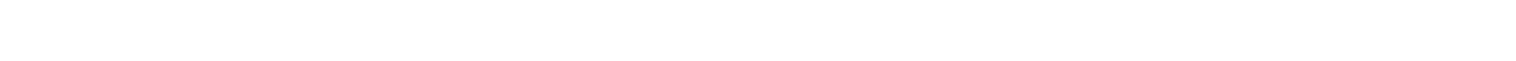
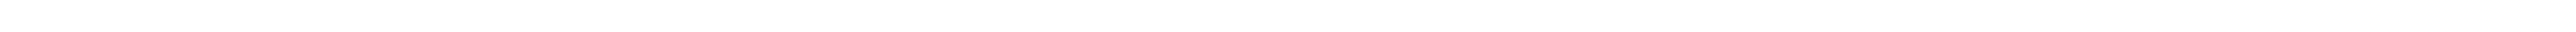
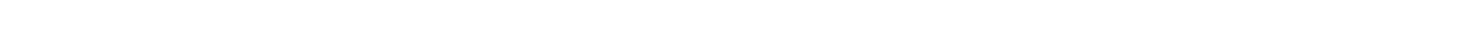

In [16]:
print(len(FONTNAMES_NONSCRIPT))
HTML(preview_html_image(FONTNAMES_NONSCRIPT, TEXT, 40))


---

## **For front-end demo**

In [ ]:
FRONT_END_DEMO_TEXT = "ML Font Recognition Tool"
FRONT_END_DEMO_SIZE = 30
FRONT_END_DEMO_FILENAME = "Front end demo.csv"

import pandas
all_fonts_images = [
    (font, img_to_data_url(text_render(font, FRONT_END_DEMO_TEXT, FRONT_END_DEMO_SIZE)))
    for font in FONTNAMES_ALL
]

df = pandas.DataFrame(all_fonts_images, columns=["Font name", "Sample text"])
df.to_csv(FRONT_END_DEMO_FILENAME, header=True, index=False)

df_loaded = pandas.read_csv(FRONT_END_DEMO_FILENAME)
df_loaded

Font name                                        Sample text
0                  0xProto  data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...
1                Agency FB  data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...
2                 Algerian  data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...
3                    Arial  data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...
4    Arial Rounded MT Bold  data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...
..                     ...                                                ...
162         Viner Hand ITC  data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...
163                Vivaldi  data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...
164        Vladimir Script  data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...
165             Wide Latin  data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...
166              Yu Gothic  data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...

[167 rows x 2 columns]


---

# **Image trimming**


In [ ]:
images = []
STR = "ABCDEFGHIJKLMNOPQRSTUVWXYZhello"

for char in STR:
    b = BytesIO()
    text_render("Arial", char, 30, color=(0,0,0,255), bg=(255,0,255,255), transparency=False).save(b, "png")
    images.append(w.Image(value=b.getvalue()))

# w.HBox(images)
for image in images:
    display(image)


---

# **Font size and pixel size correlation**

Result: ❌ do NOT use, since for the same font size, diff characters may have diff heights, take "A" and "a".

In [ ]:
TEXT = "."
FONTNAME = "Arial"
bruh = [
    (font_size, text_render(FONTNAME, TEXT, font_size).size[1])
    for font_size in range(1, 200, 10)
]
print(bruh)


[(1, 1), (11, 1), (21, 2), (31, 3), (41, 4), (51, 5), (61, 6), (71, 7), (81, 8), (91, 9), (101, 10), (111, 11), (121, 12), (131, 13), (141, 14), (151, 15), (161, 16), (171, 17), (181, 18), (191, 19)]



---

# **Image trim padding**


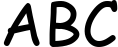

0 47 3 117


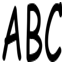

In [116]:
img = text_render("Comic Sans MS", "ABC", 60, color=(0,0,0,255), bg=(255,255,255), transparency=False).convert("L")
display(img)

# print(img.size)
# print(img.getbbox())
# img_cropped = img.crop(img.getbbox())

def getbbox2(img):
    def get_top_bottom(arr, thresh: float, color: float):
        top, bottom = 0, arr.shape[0]

        for y, row in enumerate(arr):
            if abs(row - color).max() <= thresh: top = y
            else: break

        for y in range(arr.shape[0])[::-1]:
            row = arr[y]
            if abs(row - color).max() <= thresh: bottom = y
            else: break
        return top, bottom

    thresh = 0.50
    color = 1.00
    pixels = (np.array(img) / 255.0) ** 2.2
    pixels_rotated = pixels.transpose()

    top, bottom = get_top_bottom(pixels, thresh, color)
    left, right = get_top_bottom(pixels_rotated, thresh, color)

    return (top, bottom, left, right)

top, bottom, left, right = getbbox2(img)
print(top, bottom, left, right)
img_cropped = img.crop((left, top, right, bottom))
# img_cropped

prepare_image(img, 64)
